## Data Wrangling:
The first crucial step is to prepare the dataset to ensure it's suitable for a supervised learning model. This involves cleaning and organizing the data to improve the model's performance. The following actions will be taken:

**Correcting inaccurate data types**: Ensure that each column has the appropriate data type for accurate analysis and model training.


**Handling missing data**: Address missing values by either filling them in with appropriate estimates or removing rows/columns where necessary.


**Removing duplicates**: Eliminate any duplicate records to prevent skewing the model with redundant data.


**Dropping irrelevant columns**: Remove columns that do not contribute to the prediction task, ensuring a more efficient model.


**Validating data consistency**: Check for inconsistencies in the dataset and ensure uniformity across all records to maintain data integrity.

*Below is a breakdown of the columns and their definitions*:

GameID: Unique ID for each game

LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues

Age: Age of each player

HoursPerWeek: Hours spent playing per week

TotalHours: Total hours spent playing

APM: Action per minute

SelectByHotkeys: Number of unit selections made using hotkeys per timestamp

AssignToHotkeys: Number of units assigned to hotkeys per timestamp

UniqueHotkeys: Number of unique hotkeys used per timestamp

MinimapAttacks: Number of attack actions on minimal per timestamp

MinimapRightClicks: Number of right-clicks on minimal per timestamp

NumberOfPACs: Number of PACs per timestamp

GapBetweenPACs: Mean duration between PACs (milliseconds)

ActionLatency: Mean latency from the onset of PACs to their first action (milliseconds)

ActionsInPAC: Mean number of actions within each PAC

TotalMapExplored: Number of 24x24 game coordinate grids viewed by player per timestamp

WorkersMade: Number of SCVs, drones, probes trained per timestamp

UniqueUnitsMade: Unique units made per timestamp

ComplexUnitsMade: Number of ghosts, investors, and high templars trained per timestamp

ComplexAbilityUsed: Abilities requiring specific targeting instructions used per timestamp

MaxTimeStamp: Time stamp of game's last recorded event

Import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Import and convert the CSV file into a dataframe.

In [111]:
sc_df = pd.read_csv('/Users/nelsonvanegas/Downloads/starcraft.csv')

Review the dataset.

In [113]:
sc_df.head

<bound method NDFrame.head of       GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0         52            5  27.0          10.0      3000.0  143.7180   
1         55            5  23.0          10.0      5000.0  129.2322   
2         56            4  30.0          10.0       200.0   69.9612   
3         57            3  19.0          20.0       400.0  107.6016   
4         58            3  32.0          10.0       500.0  122.8908   
...      ...          ...   ...           ...         ...       ...   
3390   10089            8   NaN           NaN         NaN  259.6296   
3391   10090            8   NaN           NaN         NaN  314.6700   
3392   10092            8   NaN           NaN         NaN  299.4282   
3393   10094            8   NaN           NaN         NaN  375.8664   
3394   10095            8   NaN           NaN         NaN  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0            0.003515         0.000220 

Review the features.

In [5]:
sc_df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp'],
      dtype='object')

There seems to be several features that are unnecessary or redundant, such as GameID or AssignToHotKey, in understanding the gameplay data, so I will remove them.

In [6]:
sc_df = sc_df[['LeagueIndex','APM', 'SelectByHotkeys', 'UniqueHotkeys', 'MinimapAttacks','MinimapRightClicks',
            'ActionsInPAC', 'ActionLatency', 'WorkersMade', 
            'UniqueUnitsMade', 'ComplexUnitsMade', 'TotalMapExplored', 
            'ComplexAbilityUsed']]

Review the info of the dataset.

In [7]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3395 non-null   int64  
 1   APM                 3395 non-null   float64
 2   SelectByHotkeys     3395 non-null   float64
 3   UniqueHotkeys       3395 non-null   float64
 4   MinimapAttacks      3395 non-null   float64
 5   MinimapRightClicks  3395 non-null   float64
 6   ActionsInPAC        3395 non-null   float64
 7   ActionLatency       3395 non-null   float64
 8   WorkersMade         3395 non-null   float64
 9   UniqueUnitsMade     3395 non-null   float64
 10  ComplexUnitsMade    3395 non-null   float64
 11  TotalMapExplored    3395 non-null   float64
 12  ComplexAbilityUsed  3395 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 344.9 KB


After reviewing the info we are able to confirm there are no null values within the dataset and that the datatypes are accurate.

In [8]:
sc_df.head()

LeagueIndex       APM  SelectByHotkeys  UniqueHotkeys  MinimapAttacks  \
0            5  143.7180         0.003515       0.000055        0.000110   
1            5  129.2322         0.003304       0.000069        0.000294   
2            4   69.9612         0.001101       0.000042        0.000294   
3            3  107.6016         0.001034       0.000011        0.000053   
4            3  122.8908         0.001136       0.000039        0.000000   

   MinimapRightClicks  ActionsInPAC  ActionLatency  WorkersMade  \
0            0.000392        4.7508        40.8673     0.001397   
1            0.000432        4.8434        42.3454     0.001193   
2            0.000461        4.0430        75.3548     0.000745   
3            0.000543        4.9155        53.7352     0.000426   
4            0.001329        9.3740        62.0813     0.001174   

   UniqueUnitsMade  ComplexUnitsMade  TotalMapExplored  ComplexAbilityUsed  
0         0.000047               0.0          0.000220            0.000000  
1         0.000087               0.0          0.000381            0.000208  
2         0.000063               0.0          0.000231            0.000189  
3         0.000075               0.0          0.000202            0.000384  
4         0.000077               0.0          0.000289            0.000019

Re-confirm that there are no null values.

In [9]:
sc_df.isnull().sum()

LeagueIndex           0
APM                   0
SelectByHotkeys       0
UniqueHotkeys         0
MinimapAttacks        0
MinimapRightClicks    0
ActionsInPAC          0
ActionLatency         0
WorkersMade           0
UniqueUnitsMade       0
ComplexUnitsMade      0
TotalMapExplored      0
ComplexAbilityUsed    0
dtype: int64

Check for duplicate rows.

In [10]:
sc_df.duplicated().sum()

1

One duplicate row was found, so I will see which specific row it was.

In [11]:
sc_df[sc_df.duplicated(keep=False)]

LeagueIndex      APM  SelectByHotkeys  UniqueHotkeys  MinimapAttacks  \
1401            5  95.5704         0.001895       0.000059        0.000462   
1409            5  95.5704         0.001895       0.000059        0.000462   

      MinimapRightClicks  ActionsInPAC  ActionLatency  WorkersMade  \
1401            0.000166        5.1618        63.3088     0.000734   
1409            0.000166        5.1618        63.3088     0.000734   

      UniqueUnitsMade  ComplexUnitsMade  TotalMapExplored  ComplexAbilityUsed  
1401         0.000059          0.000332          0.000225            0.000509  
1409         0.000059          0.000332          0.000225            0.000509

Seeing that the duplicated row is most likely an error, I will drop it. 

In [12]:
sc_df= sc_df.drop_duplicates()

All values in the dataset should be positive, so I will be checking for invalid values that are negative.

In [14]:
invalid_value = sc_df[(sc_df < 0).any(axis=1)]
invalid_value

Empty DataFrame
Columns: [LeagueIndex, APM, SelectByHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, ActionsInPAC, ActionLatency, WorkersMade, UniqueUnitsMade, ComplexUnitsMade, TotalMapExplored, ComplexAbilityUsed]
Index: []

No values are negative.

## Exploratory Data Analysis (EDA):

I will not be removing any outliers so that the model can receive exposure to unique states and strategies but I will review the distribution of data for each feature through various methods to make sure there isnt any concerning patterns or outliers that are clearly errors, as well as analyzing the correlations among all the features.

Reviewing the descriptive statistics for each row.

In [18]:
sc_df.describe()

LeagueIndex          APM  SelectByHotkeys  UniqueHotkeys  \
count  3394.000000  3394.000000      3394.000000    3394.000000   
mean      4.183854   117.053275         0.004299       0.000059   
std       1.517486    51.951637         0.005285       0.000038   
min       1.000000    22.059600         0.000000       0.000000   
25%       3.000000    79.863600         0.001258       0.000033   
50%       4.000000   108.011100         0.002500       0.000053   
75%       5.000000   142.791000         0.005133       0.000079   
max       8.000000   389.831400         0.043088       0.000338   

       MinimapAttacks  MinimapRightClicks  ActionsInPAC  ActionLatency  \
count     3394.000000         3394.000000   3394.000000    3394.000000   
mean         0.000098            0.000388      5.273021      63.739530   
std          0.000166            0.000377      1.495055      19.241702   
min          0.000000            0.000000      2.038900      24.093600   
25%          0.000000            0.000140      4.272575      50.442800   
50%          0.000040            0.000282      5.094950      60.931000   
75%          0.000119            0.000514      6.033750      73.689800   
max          0.003019            0.004041     18.558100     176.372100   

       WorkersMade  UniqueUnitsMade  ComplexUnitsMade  TotalMapExplored  \
count  3394.000000      3394.000000       3394.000000       3394.000000   
mean      0.001032         0.000085          0.000059          0.000283   
std       0.000519         0.000025          0.000111          0.000087   
min       0.000077         0.000020          0.000000          0.000091   
25%       0.000683         0.000068          0.000000          0.000224   
50%       0.000905         0.000082          0.000000          0.000270   
75%       0.001259         0.000099          0.000085          0.000325   
max       0.005149         0.000202          0.000902          0.000832   

       ComplexAbilityUsed  
count         3394.000000  
mean             0.000142  
std              0.000265  
min              0.000000  
25%              0.000000  
50%              0.000020  
75%              0.000181  
max              0.003084

Nothing appears out of the ordinary.

Next, I will analyze the data distribution for each row. First, with a histogram and then with a boxplot for greater detail, such as viewing their interquartile range and median. 

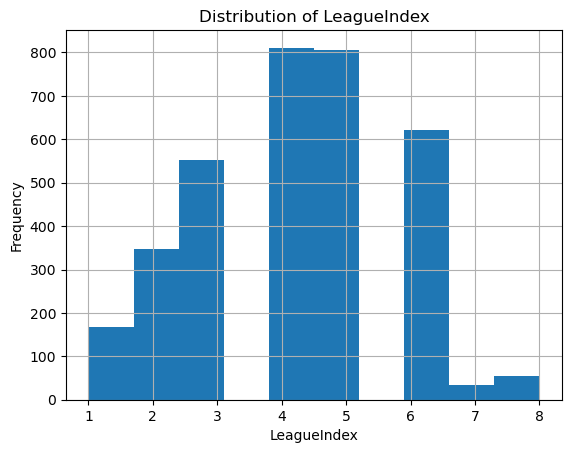

In [19]:
sc_df['LeagueIndex'].hist(bins=10)
plt.title('Distribution of LeagueIndex')
plt.xlabel('LeagueIndex')
plt.ylabel('Frequency')
plt.show()

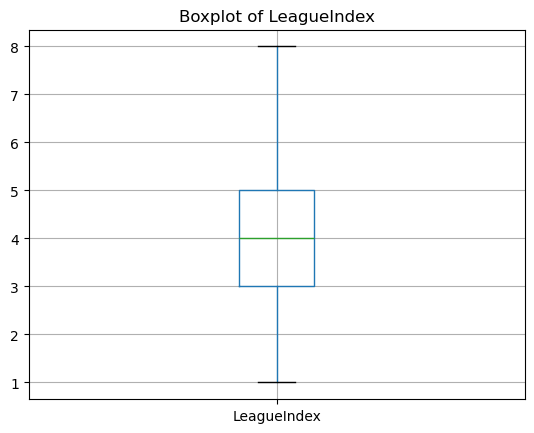

In [150]:
sc_df.boxplot('LeagueIndex')
plt.title('Boxplot of LeagueIndex')
plt.show()

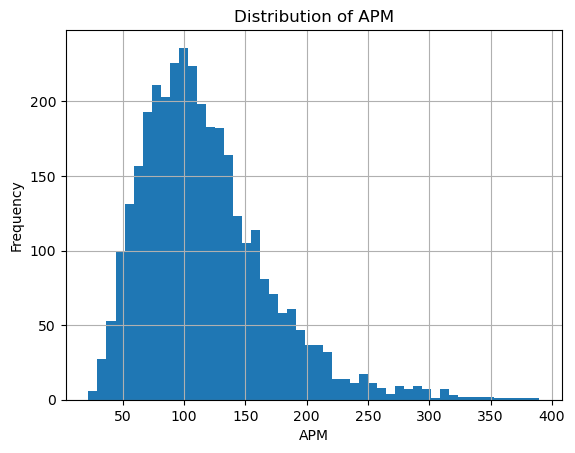

In [20]:
sc_df['APM'].hist(bins=50)
plt.title('Distribution of APM')
plt.xlabel('APM')
plt.ylabel('Frequency')
plt.show()



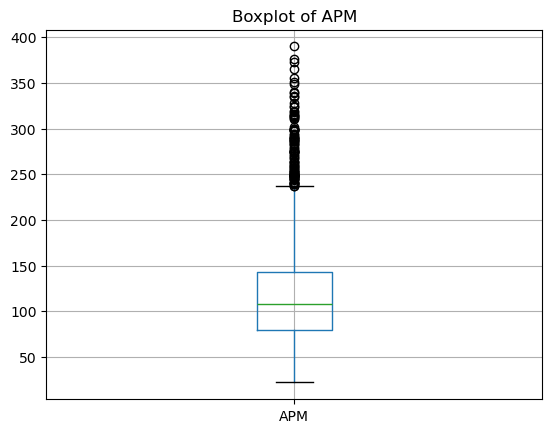

In [21]:
sc_df.boxplot('APM')
plt.title('Boxplot of APM')
plt.show()

The histogram does a better job of visualization the data than the boxplot, so I will use the histogram for feature data visualization going forward.

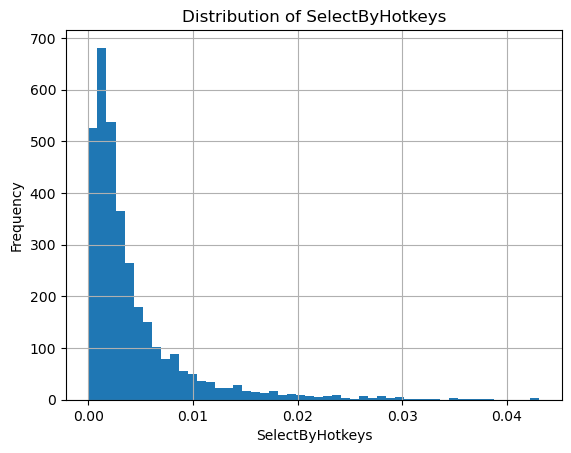

In [23]:
sc_df['SelectByHotkeys'].hist(bins=50)
plt.title('Distribution of SelectByHotkeys')
plt.xlabel('SelectByHotkeys')
plt.ylabel('Frequency')
plt.show()

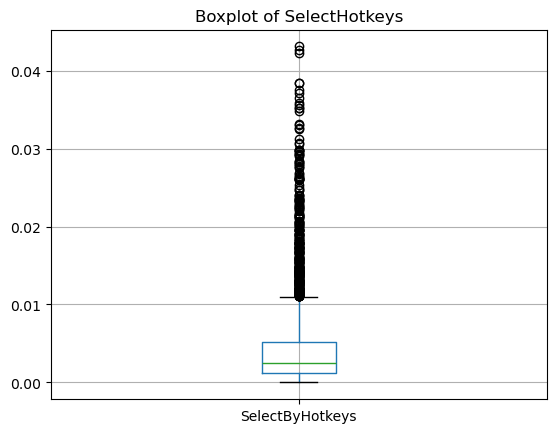

In [24]:
sc_df.boxplot('SelectByHotkeys')
plt.title('Boxplot of SelectHotkeys')
plt.show()

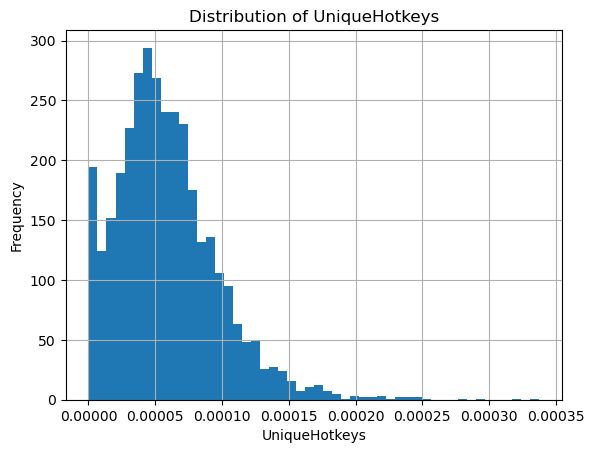

In [25]:
sc_df['UniqueHotkeys'].hist(bins=50)
plt.title('Distribution of UniqueHotkeys')
plt.xlabel('UniqueHotkeys')
plt.ylabel('Frequency')
plt.show()

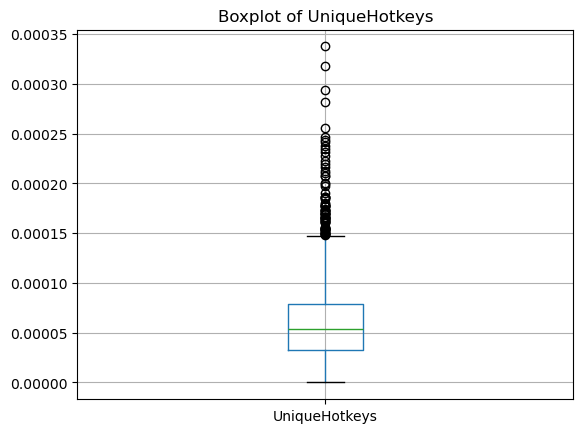

In [26]:
sc_df.boxplot('UniqueHotkeys')
plt.title('Boxplot of UniqueHotkeys')
plt.show()

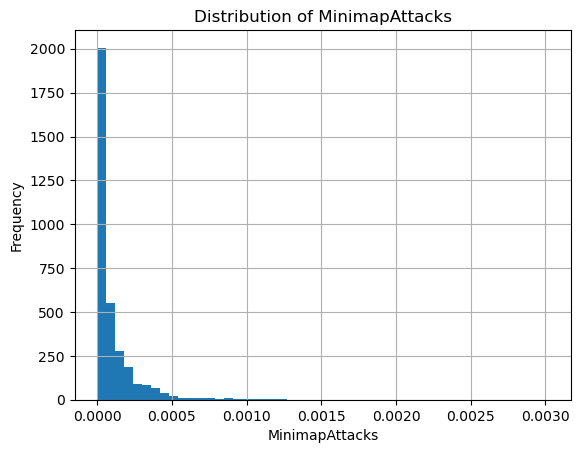

In [27]:
sc_df['MinimapAttacks'].hist(bins=50)
plt.title('Distribution of MinimapAttacks')
plt.xlabel('MinimapAttacks')
plt.ylabel('Frequency')
plt.show()

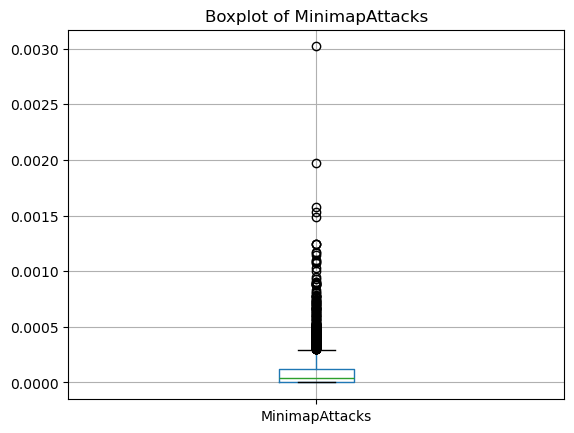

In [28]:
sc_df.boxplot('MinimapAttacks')
plt.title('Boxplot of MinimapAttacks')
plt.show()

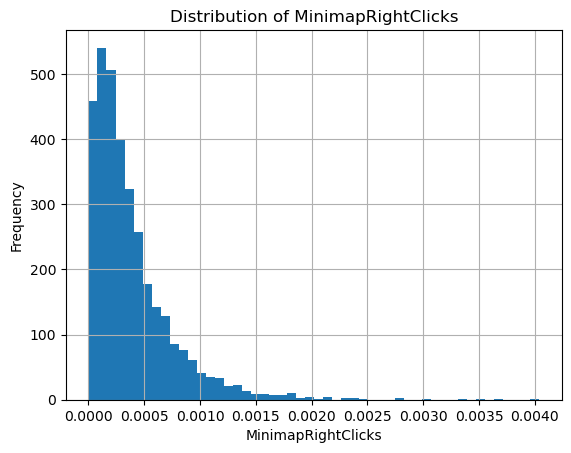

In [29]:
sc_df['MinimapRightClicks'].hist(bins=50)
plt.title('Distribution of MinimapRightClicks')
plt.xlabel('MinimapRightClicks')
plt.ylabel('Frequency')
plt.show()

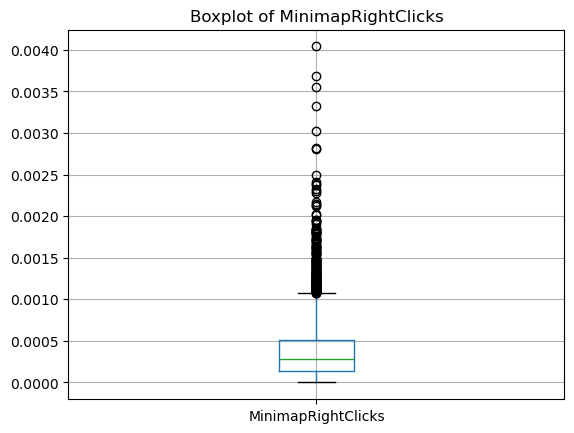

In [30]:
sc_df.boxplot('MinimapRightClicks')
plt.title('Boxplot of MinimapRightClicks')
plt.show()

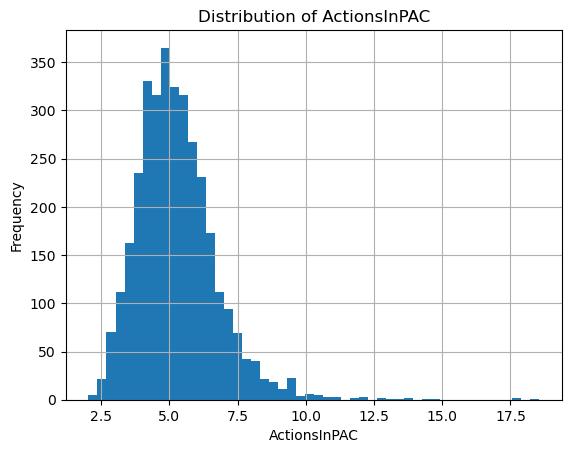

In [31]:
sc_df['ActionsInPAC'].hist(bins=50)
plt.title('Distribution of ActionsInPAC')
plt.xlabel('ActionsInPAC')
plt.ylabel('Frequency')
plt.show()

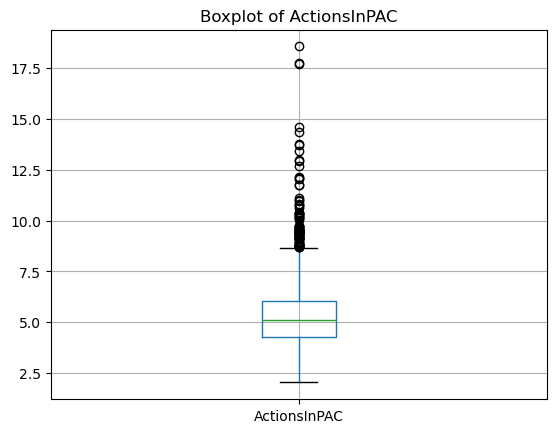

In [32]:
sc_df.boxplot('ActionsInPAC')
plt.title('Boxplot of ActionsInPAC')
plt.show()

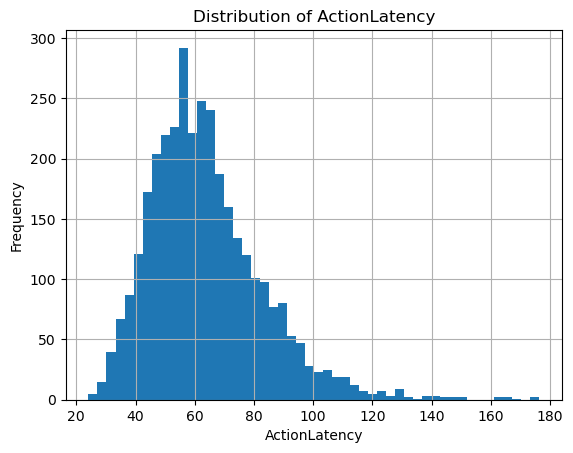

In [33]:
sc_df['ActionLatency'].hist(bins=50)
plt.title('Distribution of ActionLatency')
plt.xlabel('ActionLatency')
plt.ylabel('Frequency')
plt.show()

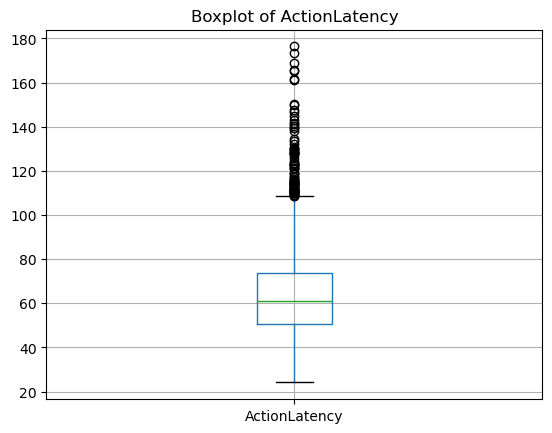

In [34]:
sc_df.boxplot('ActionLatency')
plt.title('Boxplot of ActionLatency')
plt.show()

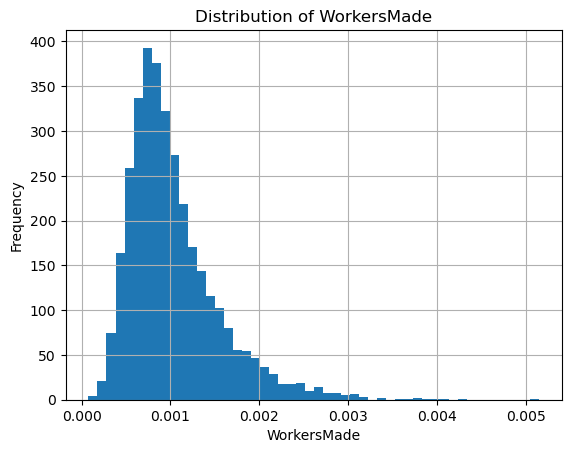

In [35]:
sc_df['WorkersMade'].hist(bins=50)
plt.title('Distribution of WorkersMade')
plt.xlabel('WorkersMade')
plt.ylabel('Frequency')
plt.show()

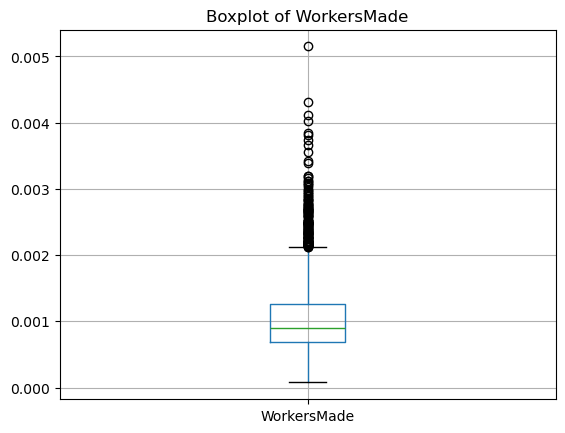

In [36]:
sc_df.boxplot('WorkersMade')
plt.title('Boxplot of WorkersMade')
plt.show()

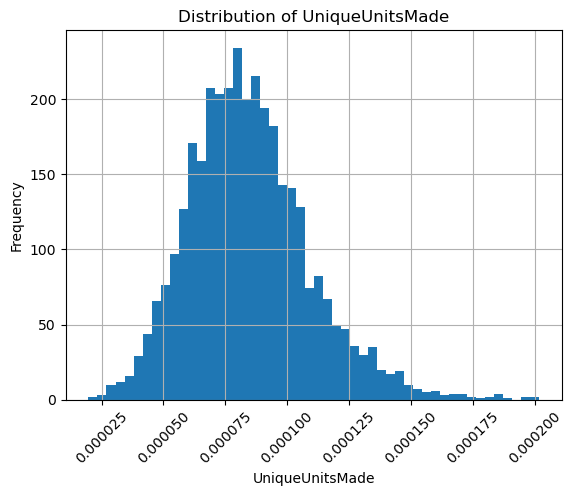

In [37]:
sc_df['UniqueUnitsMade'].hist(bins=50)
plt.title('Distribution of UniqueUnitsMade')
plt.xticks(rotation= 45)
plt.xlabel('UniqueUnitsMade')
plt.ylabel('Frequency')
plt.show()

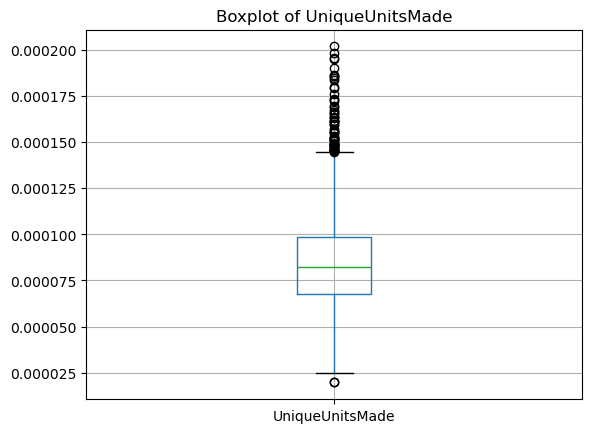

In [38]:
sc_df.boxplot('UniqueUnitsMade')
plt.title('Boxplot of UniqueUnitsMade')
plt.show()

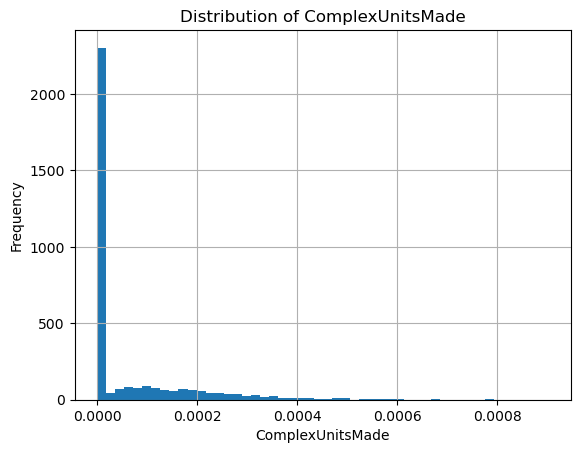

In [39]:
sc_df['ComplexUnitsMade'].hist(bins=50)
plt.title('Distribution of ComplexUnitsMade')
plt.xlabel('ComplexUnitsMade')
plt.ylabel('Frequency')
plt.show()

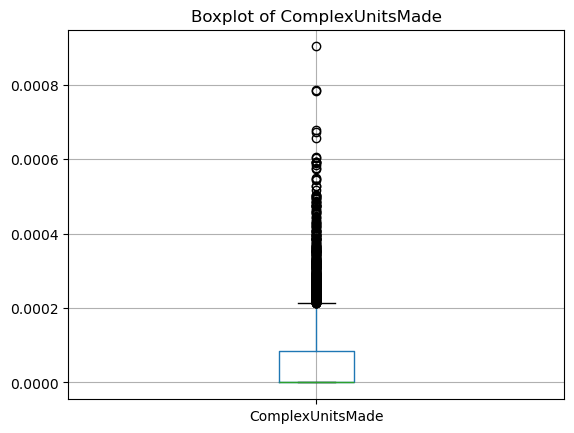

In [40]:
sc_df.boxplot('ComplexUnitsMade')
plt.title('Boxplot of ComplexUnitsMade')
plt.show()

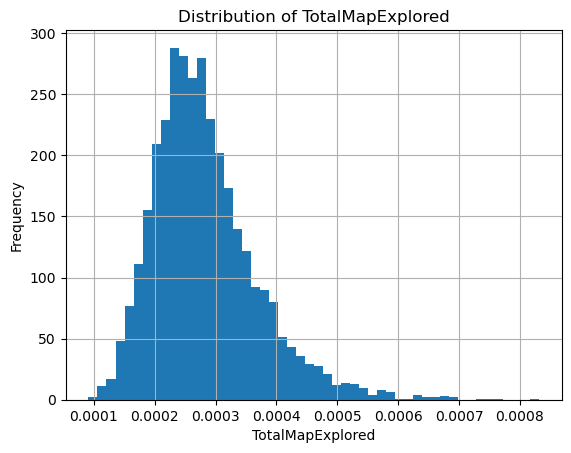

In [41]:
sc_df['TotalMapExplored'].hist(bins=50)
plt.title('Distribution of TotalMapExplored')
plt.xlabel('TotalMapExplored')
plt.ylabel('Frequency')
plt.show()

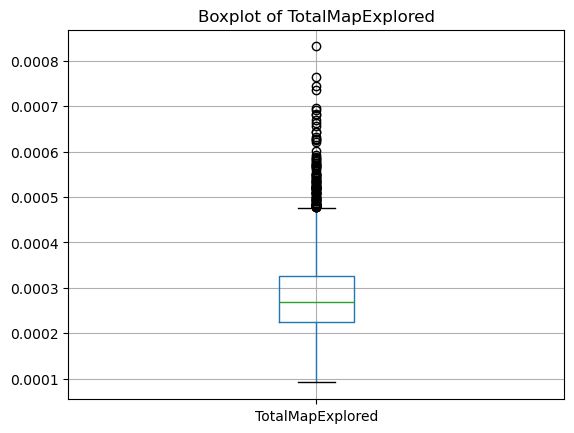

In [42]:
sc_df.boxplot('TotalMapExplored')
plt.title('Boxplot of TotalMapExplored')
plt.show()

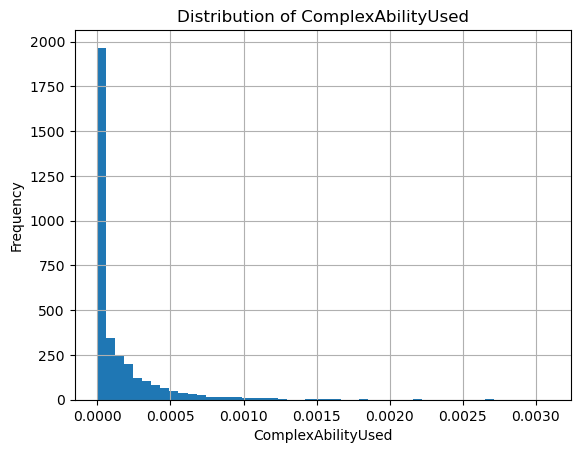

In [43]:
sc_df['ComplexAbilityUsed'].hist(bins=50)
plt.title('Distribution of ComplexAbilityUsed')
plt.xlabel('ComplexAbilityUsed')
plt.ylabel('Frequency')
plt.show()

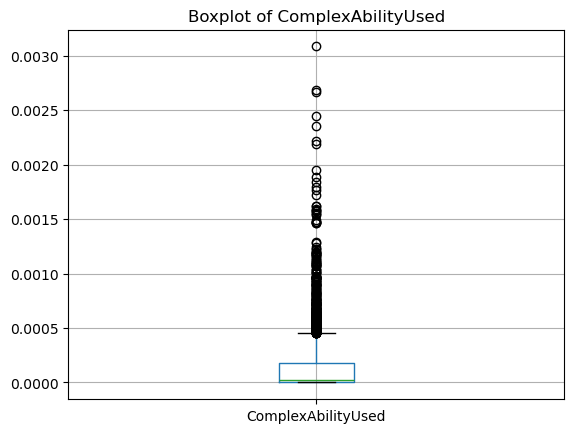

In [44]:
sc_df.boxplot('ComplexAbilityUsed')
plt.title('Boxplot of ComplexAbilityUsed')
plt.show()

After reviewing the data, the only notable outlier is the max value of MinimapAttacks (0.003) compared to the mean (0.00009). I will check its correlation with related features like APM and MaxTimeStamp to determine if it’s a valid strategy or a potential error.

Creating a scatterplot with MinimapAttacks and APM since these features should have a positive correlation.

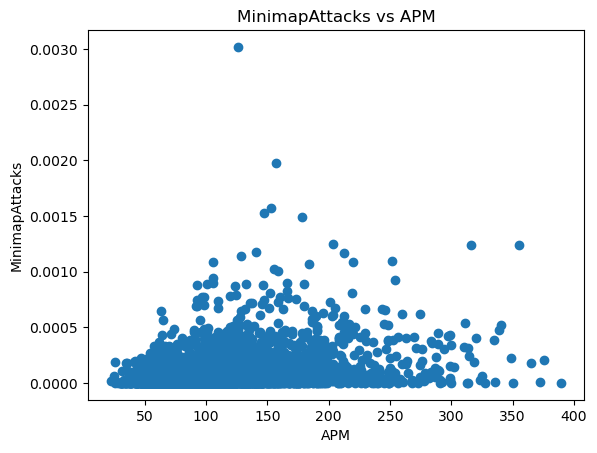

In [156]:
plt.scatter(sc_df['APM'], sc_df['MinimapAttacks'])
plt.title('MinimapAttacks vs APM')
plt.xlabel('APM')
plt.ylabel('MinimapAttacks')
plt.show()


Creating a scatterplot with MinimapAttacks and MaxTimeStamp since these features should have a positive correlation.

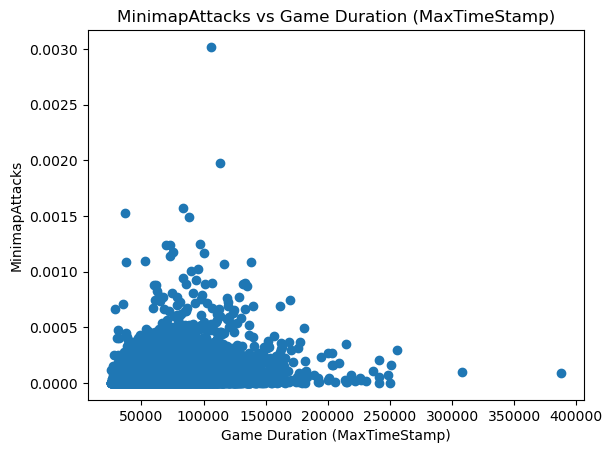

In [160]:
plt.scatter(sc_df['MaxTimeStamp'], sc_df['MinimapAttacks'])
plt.title('MinimapAttacks vs Game Duration (MaxTimeStamp)')
plt.xlabel('Game Duration (MaxTimeStamp)')
plt.ylabel('MinimapAttacks')
plt.show()

Since the max value of MinimapAttacks aligns with the mean of the related features, I will conclude it is not an error but an exceptional statistic.

Next, I will review all the correlations between the features using the corr() function, a heatmap, and a pairplot.

In [45]:
corr_matrix = sc_df.corr()
corr_matrix

LeagueIndex       APM  SelectByHotkeys  UniqueHotkeys  \
LeagueIndex            1.000000  0.662419         0.490707       0.294991   
APM                    0.662419  1.000000         0.840684       0.320454   
SelectByHotkeys        0.490707  0.840684         1.000000       0.327811   
UniqueHotkeys          0.294991  0.320454         0.327811       1.000000   
MinimapAttacks         0.312430  0.271487         0.197597       0.086285   
MinimapRightClicks     0.233346  0.322131         0.143300       0.079633   
ActionsInPAC           0.143139  0.383986         0.163277       0.146324   
ActionLatency         -0.673964 -0.722423        -0.415403      -0.196359   
WorkersMade            0.295760  0.349648         0.141657       0.127268   
UniqueUnitsMade        0.111747  0.101960         0.113335       0.388026   
ComplexUnitsMade       0.148583  0.136565         0.044371      -0.117740   
TotalMapExplored       0.233112  0.260512         0.212789       0.383231   
ComplexAbilityUsed     0.145561  0.131797         0.061243      -0.090716   

                    MinimapAttacks  MinimapRightClicks  ActionsInPAC  \
LeagueIndex               0.312430            0.233346      0.143139   
APM                       0.271487            0.322131      0.383986   
SelectByHotkeys           0.197597            0.143300      0.163277   
UniqueHotkeys             0.086285            0.079633      0.146324   
MinimapAttacks            1.000000            0.242832      0.134947   
MinimapRightClicks        0.242832            1.000000      0.307515   
ActionsInPAC              0.134947            0.307515      1.000000   
ActionLatency            -0.200029           -0.230675     -0.110225   
WorkersMade               0.078051            0.206515      0.251795   
UniqueUnitsMade          -0.036192            0.062864      0.185561   
ComplexUnitsMade          0.038723            0.092117      0.052825   
TotalMapExplored          0.033872            0.112757      0.104749   
ComplexAbilityUsed        0.043679            0.090920      0.054582   

                    ActionLatency  WorkersMade  UniqueUnitsMade  \
LeagueIndex             -0.673964     0.295760         0.111747   
APM                     -0.722423     0.349648         0.101960   
SelectByHotkeys         -0.415403     0.141657         0.113335   
UniqueHotkeys           -0.196359     0.127268         0.388026   
MinimapAttacks          -0.200029     0.078051        -0.036192   
MinimapRightClicks      -0.230675     0.206515         0.062864   
ActionsInPAC            -0.110225     0.251795         0.185561   
ActionLatency            1.000000    -0.309194        -0.044937   
WorkersMade             -0.309194     1.000000         0.236294   
UniqueUnitsMade         -0.044937     0.236294         1.000000   
ComplexUnitsMade        -0.186554     0.204241        -0.099708   
TotalMapExplored        -0.235864     0.272413         0.471647   
ComplexAbilityUsed      -0.184415     0.102209        -0.100954   

                    ComplexUnitsMade  TotalMapExplored  ComplexAbilityUsed  
LeagueIndex                 0.148583          0.233112            0.145561  
APM                         0.136565          0.260512            0.131797  
SelectByHotkeys             0.044371          0.212789            0.061243  
UniqueHotkeys              -0.117740          0.383231           -0.090716  
MinimapAttacks              0.038723          0.033872            0.043679  
MinimapRightClicks          0.092117          0.112757            0.090920  
ActionsInPAC                0.052825          0.104749            0.054582  
ActionLatency              -0.186554         -0.235864           -0.184415  
WorkersMade                 0.204241          0.272413            0.102209  
UniqueUnitsMade            -0.099708          0.471647           -0.100954  
ComplexUnitsMade            1.000000         -0.101940            0.616399  
TotalMapExplored           -0.101940          1.000000           -0.0

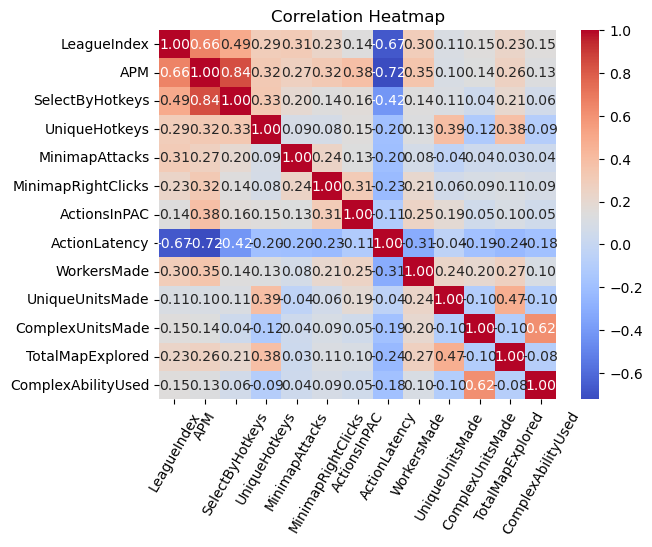

In [46]:
sns.heatmap(corr_matrix, annot= True,fmt=".2f", cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation= 60)
plt.show()

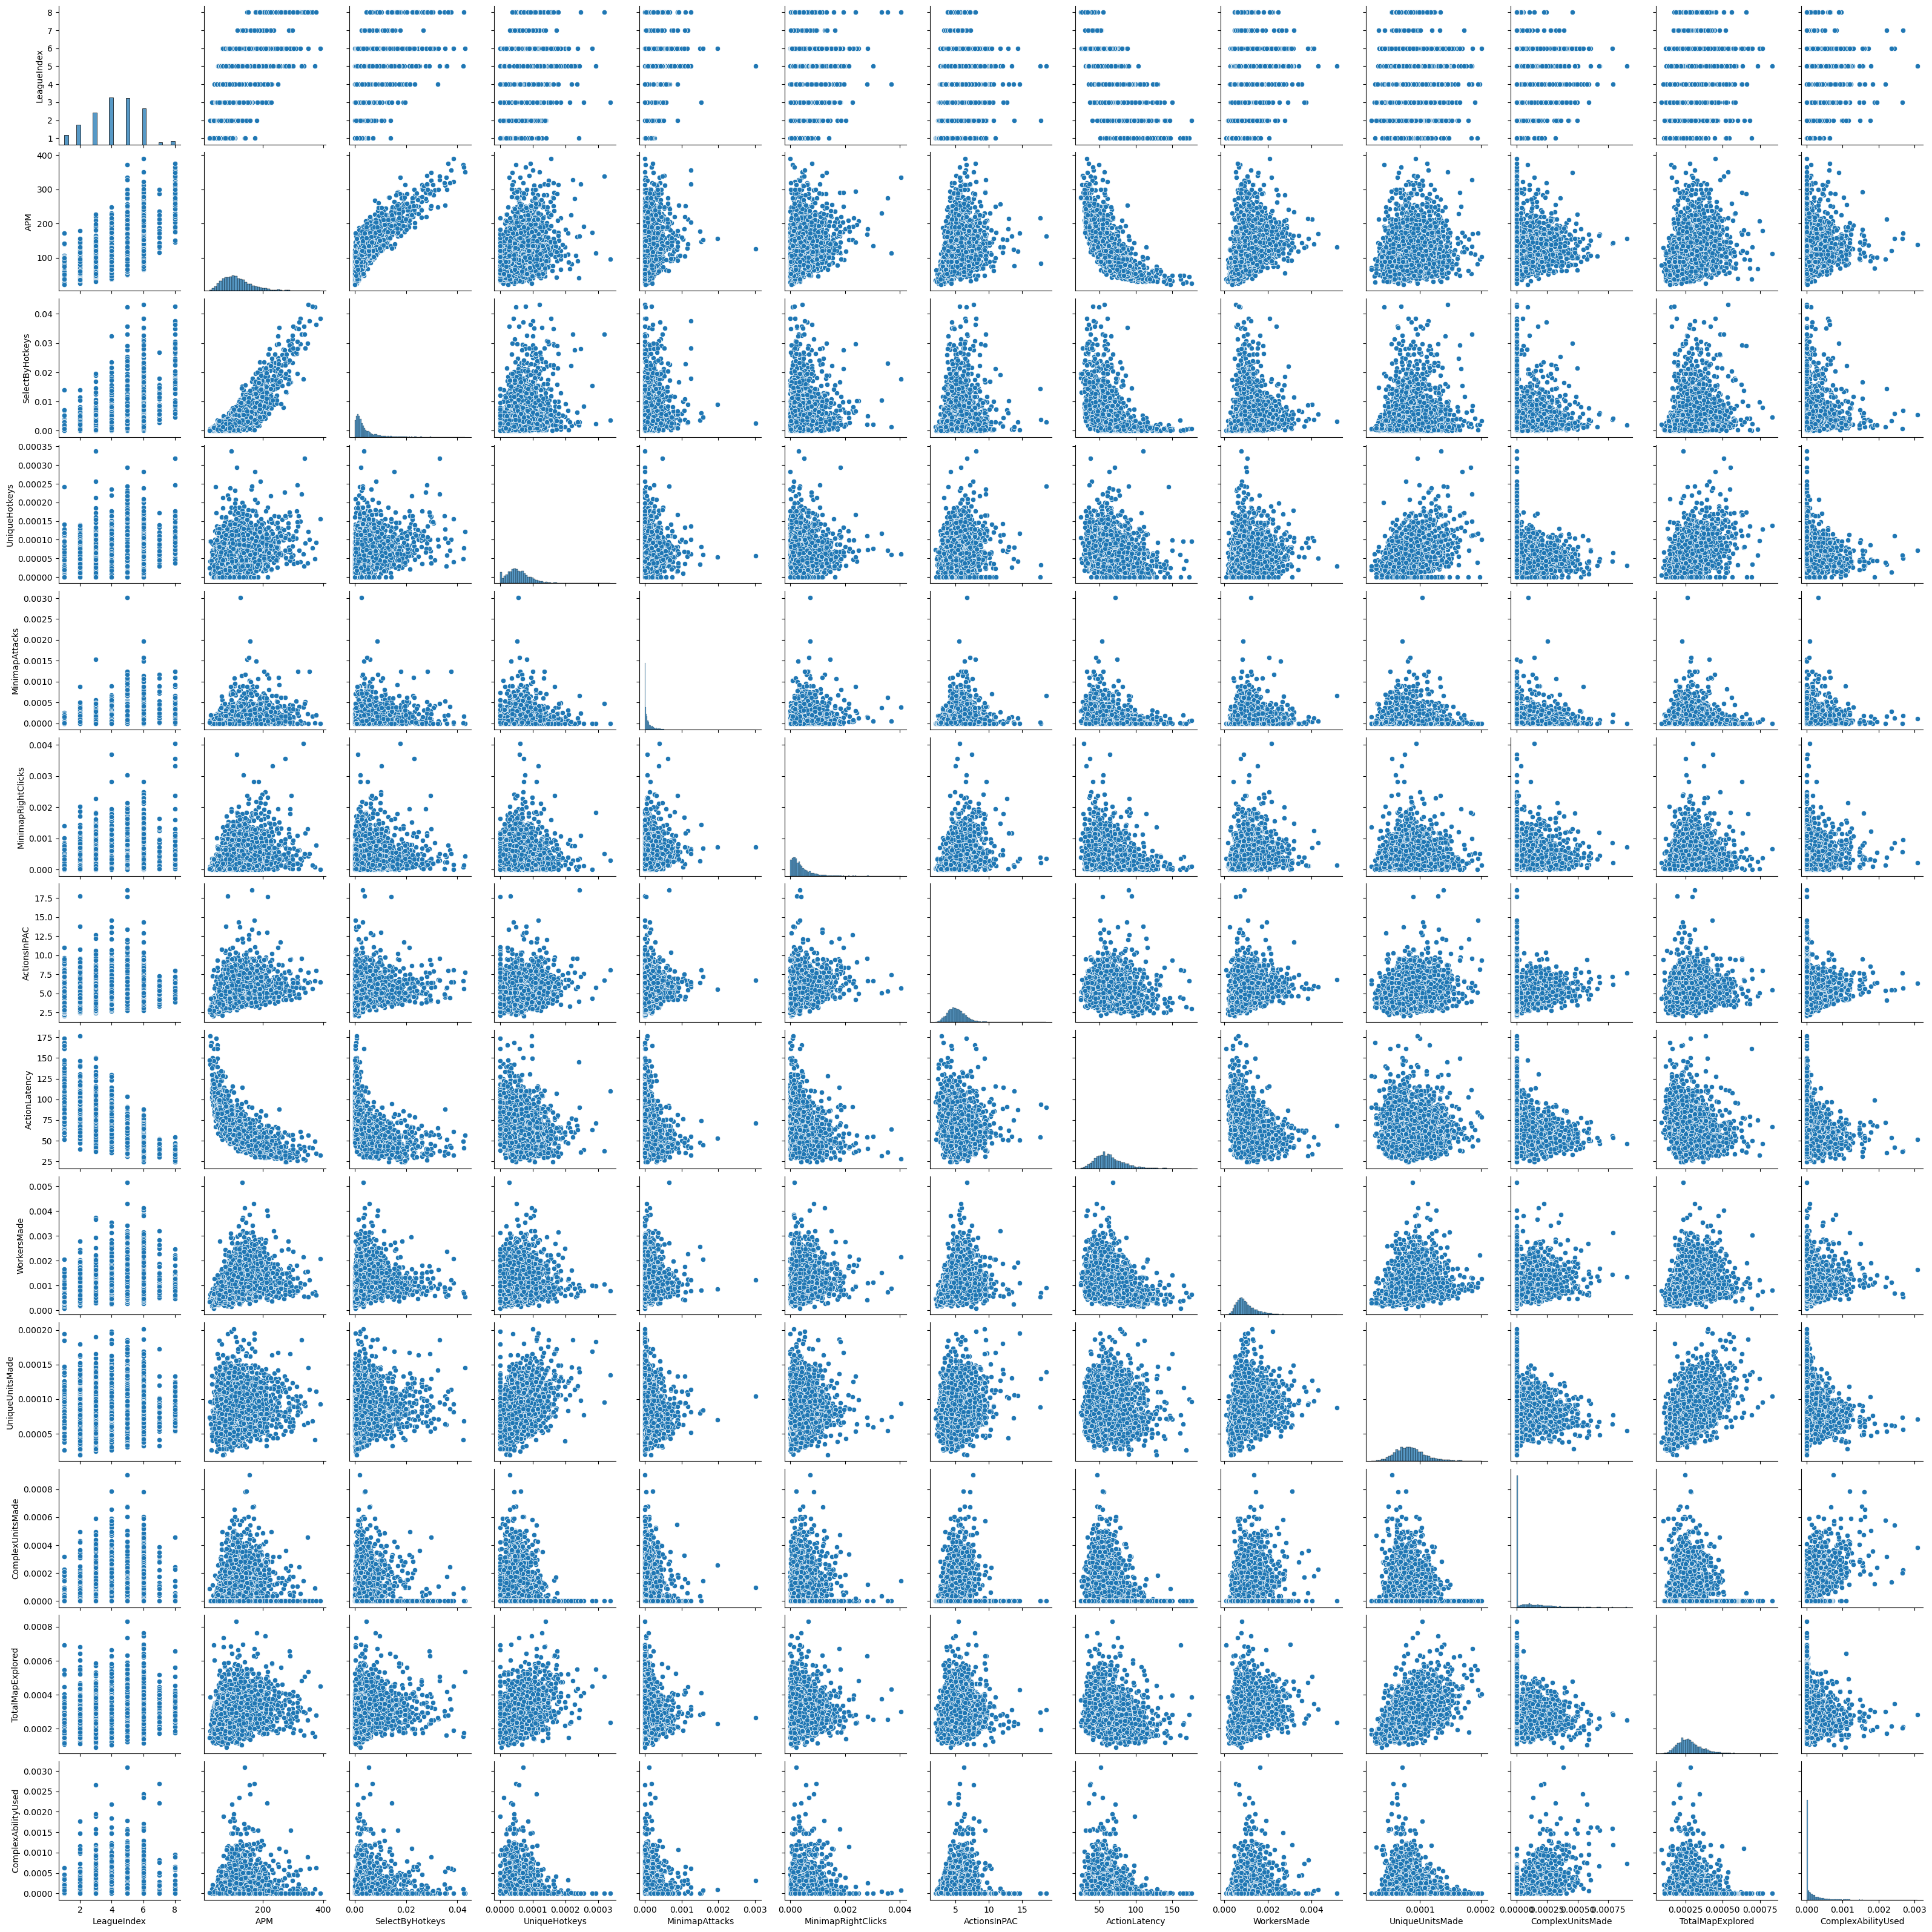

In [47]:
sns.pairplot(sc_df)
plt.show()

The highest and lowest feature correlations coefficients are APM and SelectByHotkeys(.84), APM and LeagueIndex(.66),APM and ActionLatency(-.72), ActionLatency and LeagueIndex(-.67), and ComplexAbilityUsed and ComplexUnitsMade(.62).

I will create a scatterplot for each of these correlations to analyze in greater detail.

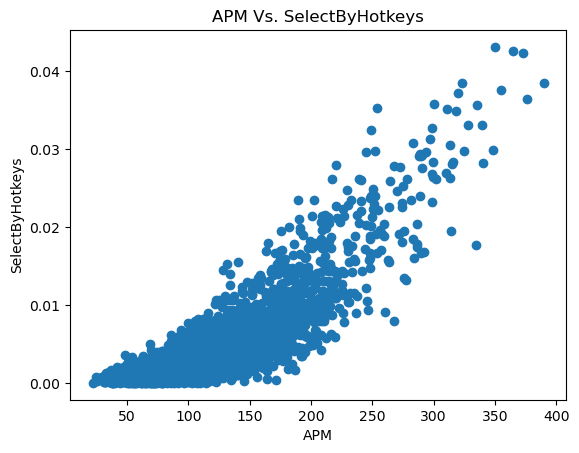

In [48]:
plt.scatter(sc_df['APM'], sc_df['SelectByHotkeys'])
plt.title('APM Vs. SelectByHotkeys')
plt.xlabel('APM')
plt.ylabel('SelectByHotkeys')
plt.show()

It makes sense both APM and SelectByHotkeys are positively correlated since they both rely on quick actions.

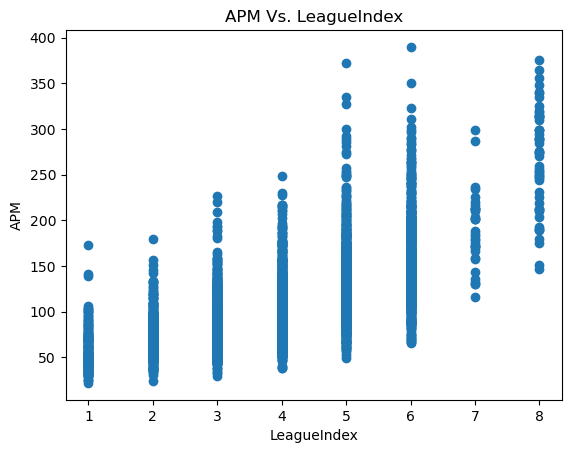

In [174]:
plt.scatter(sc_df['LeagueIndex'], sc_df['APM'])
plt.title('APM Vs. LeagueIndex')
plt.xlabel('LeagueIndex')
plt.ylabel('APM')
plt.show()

It makes sense both APM and LeagueIndex are positively correlated since action speed is a good indicator of a player's skill.

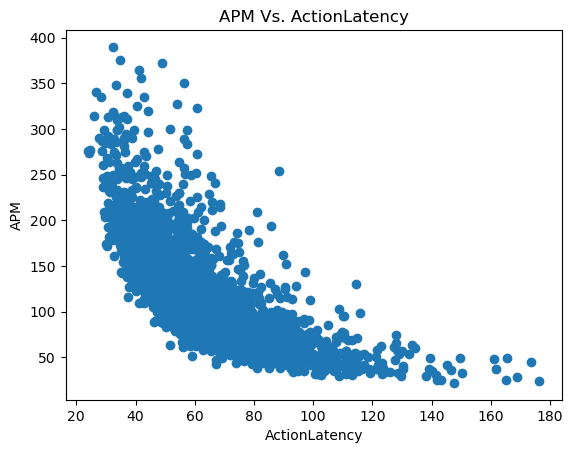

In [179]:
plt.scatter(sc_df['ActionLatency'], sc_df['APM'])
plt.title('APM Vs. ActionLatency')
plt.xlabel('ActionLatency')
plt.ylabel('APM')
plt.show()

It makes sense both APM and ActionLatency are negatively correlated since latency slows down action speed.

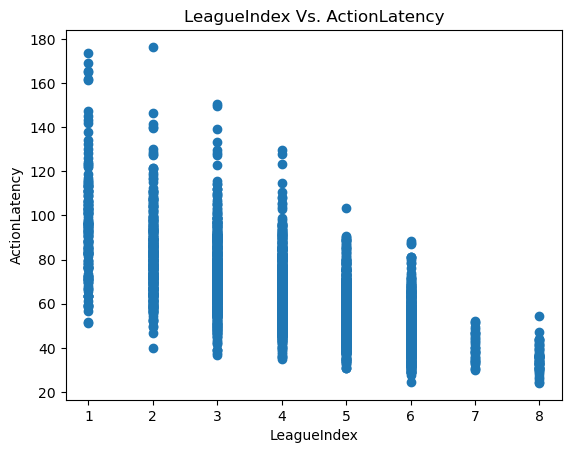

In [99]:
plt.scatter(sc_df['LeagueIndex'], sc_df['ActionLatency'])
plt.title('LeagueIndex Vs. ActionLatency')
plt.xlabel('LeagueIndex')
plt.ylabel('ActionLatency')
plt.show()

It makes sense both LeagueIndex and ActionLatency are negatively correlated since latency, like speed, is a good indicator of a player's skill.

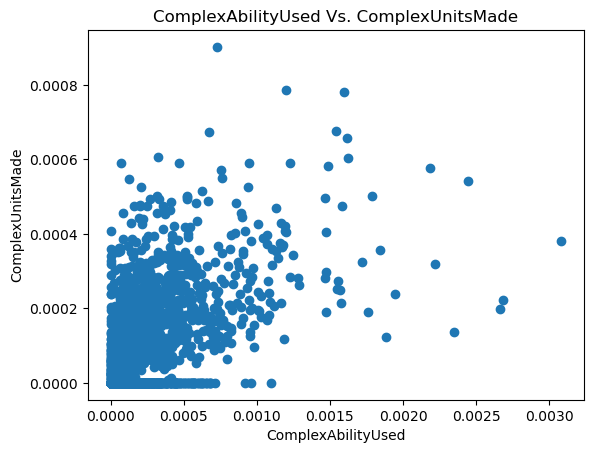

In [49]:
plt.scatter(sc_df['ComplexAbilityUsed'], sc_df['ComplexUnitsMade'])
plt.title('ComplexAbilityUsed Vs. ComplexUnitsMade')
plt.xlabel('ComplexAbilityUsed')
plt.ylabel('ComplexUnitsMade')
plt.show()

It makes sense both ComplexAbilityUsed and ComplexUnitsMade are positively correlated since ComplexAbilitiesUsed relies on ComplexAbilitesMade.

 ## Conclusion:
In these steps, we successfully completed the data wrangling and EDA necessary to prepare the StarCraft II dataset for model training. The key steps taken were:

**Data Cleaning**: We addressed missing values, corrected inaccurate data types, and removed duplicate entries to ensure the dataset's integrity.

**Feature Selection**: Irrelevant columns were dropped, and only relevant features for predicting the target variable, LeagueIndex, were retained to improve model performance.

**Outlier Analysis**: Special attention was given to identifying and analyzing outliers, such as the outlier in MinimapAttacks. After comparing it with related features like APM and game duration, it was determined to be an exceptional but valid statistic rather than an error.

**Correlation Analysis**: We explored relationships between key features using correlation matrices and visualizations, which provided insights into how various gameplay actions (e.g., APM, TotalMapExplored) correlate with each other and affect player performance.

With the dataset now properly cleaned and understood, we are ready to move forward with the model training phase, where we will use these features to build a supervised learning model aimed at predicting LeagueIndex based on in-game behaviors and strategies.